+# Линейная регрессия

*Линейная регрессия (linear regression)* — метод восстановления зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) $x$ с линейной функцией зависимости. Данный метод позволяет предсказывать значения зависимой переменной $y$ по значениям независимой переменной $x$.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame({'Комнат': [1, 2, 3, 4, 5, 6, 7], 'Цена, тысяч': [1500, 2000, 2500, 3000, np.nan, 4000, 4500]})
df

,Комнат,"Цена, тысяч"
0,1,1500.0
1,2,2000.0
2,3,2500.0
3,4,3000.0
4,5,NaN
5,6,4000.0
6,7,4500.0


### Задача
Хотим спрогнозировать цену квартиры.

$$
цена = 500 * (количество~комнат) + (базовая~цена = 1000)
$$

Разработали модель, которая дает прогноз цены квартиры, основанный на признаке количества комнат. Цена за комнату - вес признака, а базовая цена - начальное смещение модели.

Иными совами видим линейную зависимость, где семейство (пучок) прямых задается уравнением:
$$
y = k * x + b
$$

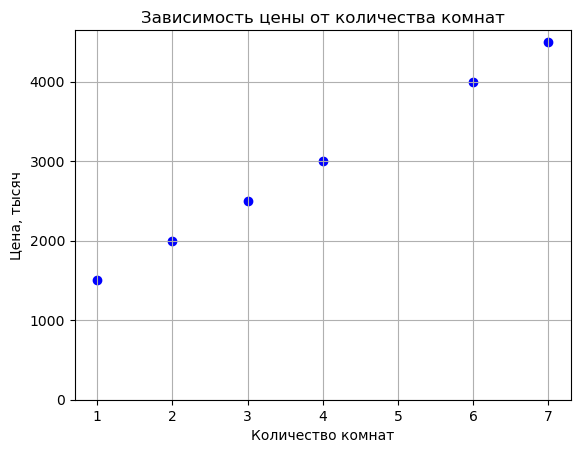

In [7]:
plt.scatter(df['Комнат'], df['Цена, тысяч'], color='blue', marker='o')

plt.xlabel('Количество комнат')
plt.ylabel('Цена, тысяч')
plt.title('Зависимость цены от количества комнат')

plt.ylim(bottom=0)
plt.grid(True)
plt.show()

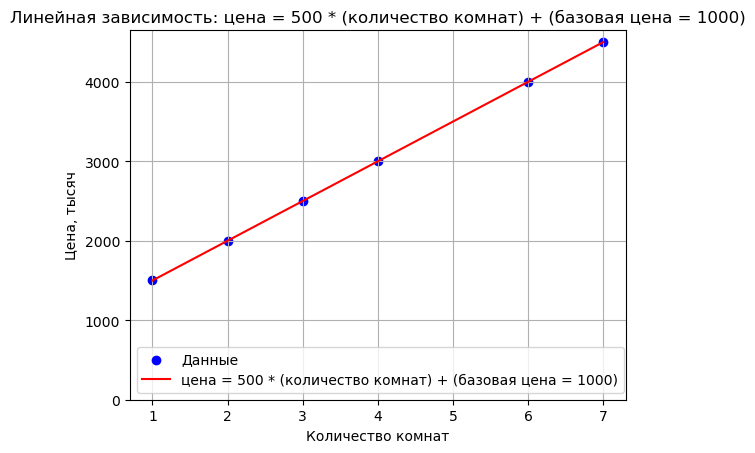

In [8]:
plt.scatter(df['Комнат'], df['Цена, тысяч'], color='blue', label='Данные')

x_vals = np.linspace(min(df['Комнат']), max(df['Комнат']), 100)  # 100 точек от 1 до 7
y_vals = 500 * x_vals + 1000

plt.plot(x_vals, y_vals, color='red', label='цена = 500 * (количество комнат) + (базовая цена = 1000)')  # линия

plt.xlabel('Количество комнат')
plt.ylabel('Цена, тысяч')
plt.title('Линейная зависимость: цена = 500 * (количество комнат) + (базовая цена = 1000)')
plt.ylim(bottom=0)
plt.grid(True)
plt.legend()
plt.show()

   Комнат  Цена, тысяч
0       1       1547.0
1       2       2269.0
2       3       2934.0
3       4       3185.0
4       5          NaN
5       6       4874.0
6       7       5145.0


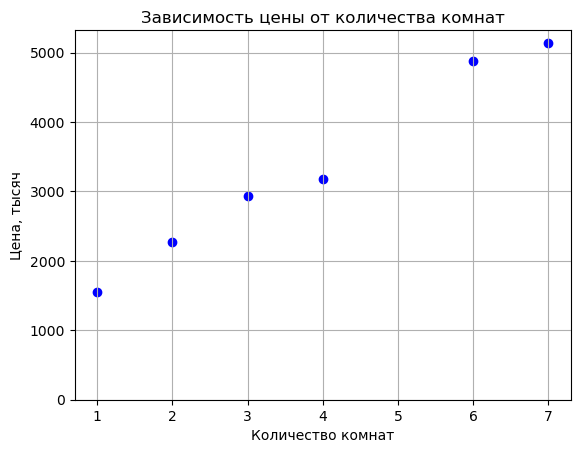

In [9]:
df_1 = pd.DataFrame({'Комнат': [1, 2, 3, 4, 5, 6, 7], 'Цена, тысяч': [1547, 2269, 2934, 3185, np.nan, 4874, 5145]})
print(df_1)

plt.scatter(df_1['Комнат'], df_1['Цена, тысяч'], color='blue', marker='o')

plt.xlabel('Количество комнат')
plt.ylabel('Цена, тысяч')
plt.title('Зависимость цены от количества комнат')

plt.ylim(bottom=0)
plt.grid(True)
plt.show()

Новый набор данных довольно близок к исходному, поэтому будем использовать ту же формулу. Разница лишь в том, что сейчас цены не совсем такие, как указано в формуле, и есть небольшое расхождение. Учтем его в нашей формуле:

$$
цена = 500 * (количество~комнат) + (небольшое~расхождение)
$$

Если мы хотим спрогнозировать цены, можем применить это уравнение. Даже если не уверены, что получим фактическое значение, мы знаем, что, скорее всего, приблизимся к нему.

#### Зададимся вопросом: "Как мы пришли к этому уравнению, почему выбрали именно его из всего параметрического семейства прямых и самое главное - как нам научить компьютер находить такие уравнения?"

Взглянем еще раз на график и заметим, что наша прямая проходит через все точки. В общем случае мы стараемся выбрать прямую, которая проходит близко ко всем точкам. Может быть, существует вариант и получше, но мы по крайней мере знаем, что этот вариант хорош, в отличие от того, который вообще не приближается к точкам (поиск наилучшей прямой - задача оптимизации).

## Что если у нас будет больше одного признака, например 2 или 3, а если $n$ ($n \in \mathbb{N}$)? Многомерная линейная регрессия

$$
цена = 500 * (количество~комнат) + 2 * (район) + 5.6 * (этаж)+ ... + - 3.4 * (текущий~год - год~постройки~дома) + (смещение)
$$

Веса, которые положительно коррелируют с таргетом имеют положительный знак, в противном случае отрицательный. Если вес признака равен 0, значит он не влияет на таргет.
Если у нас один признак, т.е модель имеет вид $y = \beta_1 * x_1 + \beta_0$ геометрически можно представить модель как прямую, если $y = \beta_1 * x_1 + \beta_2 * x_2 + \beta_0$ - плоскость, если $y = \beta_1 * x_1 + \beta_2 * x_2 + \beta_3 * x_3 + ... + \beta_n * x_n + \beta_0 = \sum_{i = 1}^{n} \beta_i * x_i + \beta_0$ такое уже сложно визуализировать

## Базовая интерпретация алгоритма или как компьютер поводит прямые

1. Выбираем модель со случайными весами и случайным смещением.
2. Выбираем случайную точку данных.
3. Слегка отрегулируем веса и смещение, чтобы улучшить прогноз для конкретной точки данных

Повторяем шаги 1 - 3 многократно.

#### Возникают резонные вопросы:
1. На сколько нужно отрегулировать вес? (Спойлер: интерполяция)
2. Сколько раз нужно повторить алгоритм? Другими словами, как понять, когда заканчивать? - (Спойлер: Loss/функционал качества)
3. Как понять, что алгоритм работает? - (Спойлер: Градиентный спуск)


### Некоторые приемы приближения прямой к точке

**Квадратический подход**;

Скорость обучения — очень маленькое число, которое мы выбираем перед обучением модели. Оно помогает убедиться, что модель при обучении меняется по чуть-чуть. Обозначим его $\epsilon$.

Запускаем алгоритм:
1. Выбираем модель со случайными весами: $y = \beta_{1} * x + \beta_{0}$
2. Выбираем случайную точку $(y^i, x^i)$.
3. Регулируем веса следующим образом:
$$
\beta_{1}^{'} = \beta_{1} + \epsilon * x * (y - y^i)
$$
$$
\beta_{0}^{'} = \beta_{0} + \epsilon * (y - y^i)
$$
4. Получаем новую прямую $y^{'} = \beta_{1}^{'} * x + \beta_{0}^{'}$

In [10]:
def square_approach(base_price, price_per_room, room_count, price, learning_rate):
    """
    :param base_price: начальное смещение модели (beta_{0})
    :param price_per_room: цена за комнату (вес, beta_{1})
    :param room_count: число комнат (x^{i})
    :param price: цена в выбранной случайной точке (см. пункт 2 алгоритма - y^{i}})
    :param learning_rate: скорость обучения (epsilon)

    :return: price_per_room - (новый коэффициент beta_{1}^{'}), base_price - (новый коэффициент beta_{0}^{'})
    """

    # Вычисляем прогноз
    predicted_price = base_price + price_per_room * room_count

    # Новые веса
    base_price += learning_rate * (price - predicted_price)
    price_per_room += learning_rate * room_count * (price - predicted_price)

    return base_price, price_per_room

In [11]:
import random


def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    price_per_room = random.random()
    base_price = random.random()

    for epoch in range(epochs):
        i = random.randint(0, len(features) - 1)
        room_count = features[i]
        price = labels[i]
        price_per_room, base_price = square_approach(base_price, price_per_room, room_count, price, learning_rate)

    return price_per_room, base_price

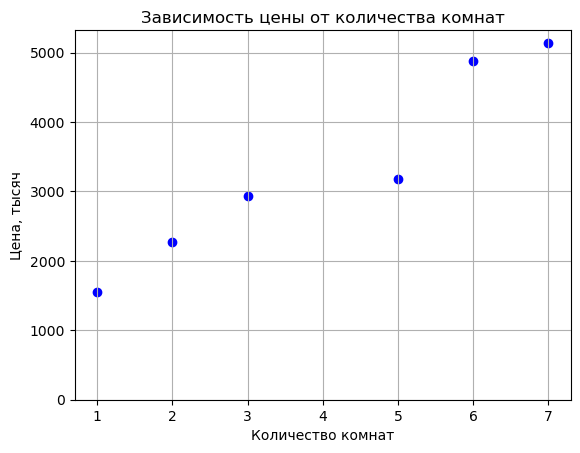

In [12]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([1547, 2269, 2934, 3185, 4874, 5145])

plt.scatter(features, labels, color='blue', marker='o')

plt.xlabel('Количество комнат')
plt.ylabel('Цена, тысяч')
plt.title('Зависимость цены от количества комнат')

plt.ylim(bottom=0)
plt.grid(True)
plt.show()

beta_1: 657.06, beta_0: 652.49


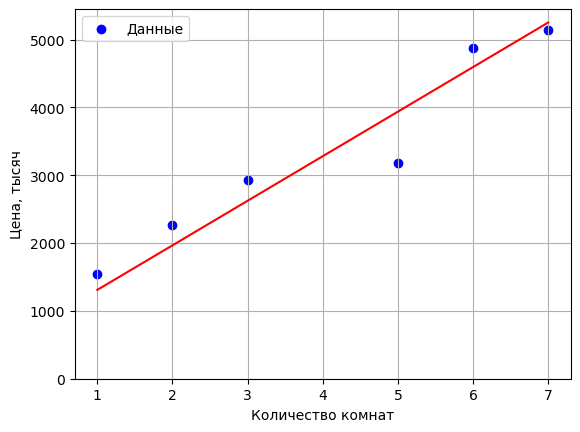

In [57]:
plt.scatter(features, labels, color='blue', label='Данные')

x_vals = np.linspace(min(features), max(features), 100)

beta_1, beta_0 = linear_regression(features, labels, learning_rate=0.001, epochs=1000)
print(f"beta_1: {round(beta_1, 2)}, beta_0: {round(beta_0, 2)}")
y_vals = beta_1 * x_vals + beta_0

plt.plot(x_vals, y_vals, color='red')

plt.xlabel('Количество комнат')
plt.ylabel('Цена, тысяч')
plt.ylim(bottom=0)
plt.grid(True)
plt.legend()
plt.show()

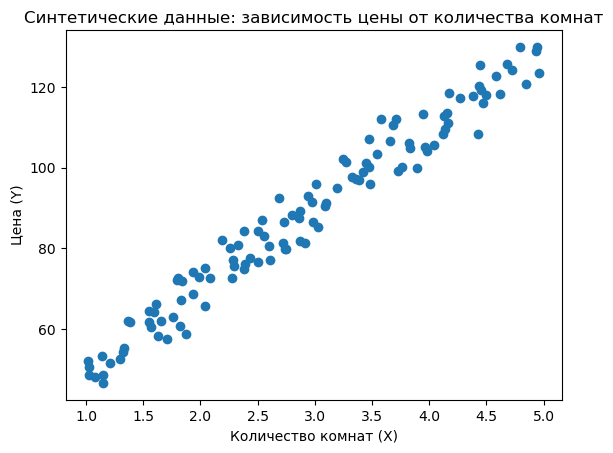

In [58]:
X = np.random.uniform(1, 5, size=115)
Y = 30 + 20 * X + np.random.normal(0, 5, size=X.shape)

plt.scatter(X, Y)
plt.xlabel('Количество комнат (X)')
plt.ylabel('Цена (Y)')
plt.title('Синтетические данные: зависимость цены от количества комнат')
plt.show()

beta_1: 22.58, beta_0: 22.53


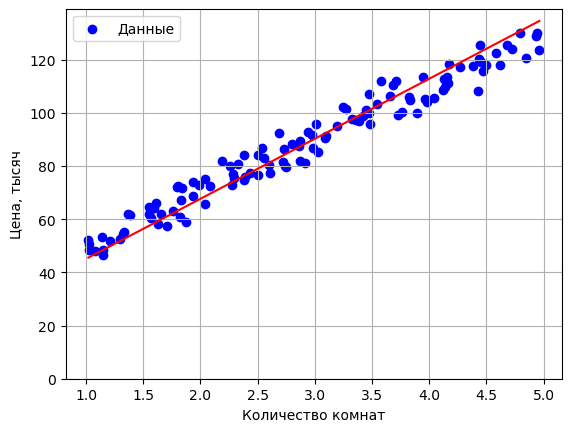

In [64]:
plt.scatter(X, Y, color='blue', label='Данные')
X_vals = np.linspace(min(X), max(X), 200)
beta_1, beta_0 = linear_regression(X, Y, learning_rate=0.01, epochs=100)
print(f"beta_1: {round(beta_1, 2)}, beta_0: {round(beta_0, 2)}")
Y_vals = beta_1 * X_vals + beta_0

plt.plot(X_vals, Y_vals, color='red')

plt.xlabel('Количество комнат')
plt.ylabel('Цена, тысяч')
plt.ylim(bottom=0)
plt.grid(True)
plt.legend()
plt.show()

## Строгая постановка и описание задачи

Линейная регрессия является фундаментальным методом машинного обучения. Модель линейной регрессии учится на размеченных наборах данных и сопоставляет точки данных с наиболее подходящими линейными функциями, которые можно использовать для прогнозирования новых данных (простой алгоритм аппроксимации).

### Математическая постановка задачи.
Дано:
1. $f_1(x), f_2(x), ... , f_n(x)$ - числовые признаки
2. Модель многомерной линейной регрессии:
$$
f(\beta, x) = \sum_{i=1}^{n} \beta_if_i(x), \beta \in \mathbf{R}^n
$$
3. Обучающая выборка: множество пар $(x_i, y_i)_{i = 1,2,...,n}$, где $x_i \in \mathbf{R}^n$, $y_i \in \mathbf{R}$

#### В матричном виде

$$
F_{m\times n}
=
\begin{pmatrix}
f_1(x_1) & \dots & f_n(x_1) \\
\vdots   & \ddots & \vdots   \\
f_1(x_m) & \dots & f_n(x_m)
\end{pmatrix},
\quad
y_{m\times1}
=
\begin{pmatrix}
y_1 \\
\vdots \\
y_m
\end{pmatrix},
\quad
\beta_{n\times1}
=
\begin{pmatrix}
\beta_1 \\
\vdots \\
\beta_n
\end{pmatrix}
$$
- $F$ — матрица объектов-признаков, где строки соответствуют объектам а столбцы — признакам
- $Y$ — вектор ответов (целевой вектор)
- $\beta$ — вектор коэффициентов

В этих трех векторно-матричных обозначениях очень удобно расписать постановку задачи наименьших квадратов:
$$
Q(\beta, X^l)
= \sum_{i=1}^n \bigl(f(x_i, \beta) - y_i\bigr)^2
= \bigl\lVert F\,\beta - y\bigr\rVert^2
\;\;\longrightarrow\;\;
\min_{\beta}
$$
Т.е необходимо найти вектор $\beta$ при известной матрице $F$ и известном вектор-столбце $y$.

$$
\frac{\partial Q}{\partial \beta}(\beta)
= 2\,F^\top\bigl(F\,\beta - y\bigr) = 0
\quad\Longrightarrow\quad
F^\top F\,\beta = F^\top y,
$$

где $F^\top F$ — матрица $n\times n$.
Получили систему уравнений, откуда можем выразить искомый вектор $\beta$.

$$
\beta^* = \bigl(F^\top F\bigr)^{-1} F^\top y
$$

## Проблемы
В случае мультиколлинеарности (столбцы матрицы $F$ линейно-зависимы) нам не удастся найти обратную матрицу к $F^\top F\$ (она будет вырождена).

Если же столбцы матрицы $F$ почти линейно-зависимы, то у нас возникнет масса вычислительных проблем с обращением этой матрицы.

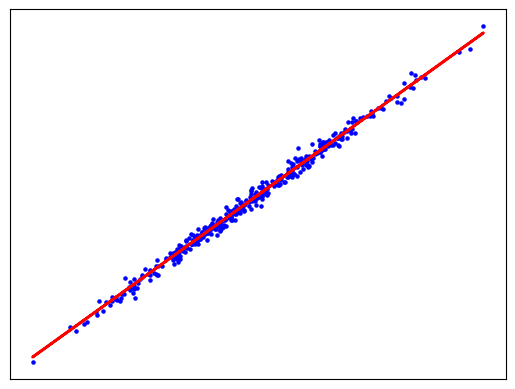

In [65]:
from sklearn import datasets, linear_model

# Генерируем данные
X, y = datasets.make_regression(n_samples=2_000, n_features=1, noise=8, shuffle=True)

# Размер обучающей и тестовой выборки
train_size = 1600
test_size = 400

# Разделяем данные
X_train = X[:-train_size]
X_test = X[-test_size:]

y_train = y[:-train_size]
y_test = y[-test_size:]

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', s=5)
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()